In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class newton_method():
    '''
    função a ser minimizada:
    np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 2*x2 - 0.1) + np.exp(-x1 - 0.2)
    '''
    def __init__(self, alpha=0.001, tol = 1e-6, rho=0.5, c=0.1, epochs=100):
        self.epochs = epochs
        self.alpha = alpha
        self.rho = rho
        self.c = c
        self.tol = tol
        
    def function(self, x):
        return np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-2*x[1]-0.1)+np.exp(-x[0]-0.2)
    
    def gradiente(self, x):
        return np.array([np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-2*x[1]-0.1)-np.exp(-x[0]-0.2), 
                         3*np.exp(x[0]+3*x[1]-0.1)-2*np.exp(x[0]-2*x[1]-0.1)])
    
    def hessiana(self, x):
        return np.array([[np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-2*x[1]-0.1)+np.exp(-x[0]-0.2),
                          3*np.exp(x[0]+3*x[1]-0.1)-2*np.exp(x[0]-2*x[1]-0.1)],
                         [3*np.exp(x[0]+3*x[1]-0.1)-2*np.exp(x[0]-2*x[1]-0.1),
                          9*np.exp(x[0]+3*x[1]-0.1)+4*np.exp(x[0]-2*x[1]-0.1)]])
    
    def fit(self, x0):
        x = np.vstack((x0 + 2 * self.tol * np.ones(x0.shape),x0)).transpose()
        i = 1

        while( i < self.epochs):
            hess = self.hessiana(x[:,i])
            grad = self.gradiente(x[:,i])
            inverse = np.linalg.inv(hess)
            lambda_2 = np.matmul(np.matmul(grad, inverse), grad.reshape(-1,1))
            
            if lambda_2 <= self.tol:
                break

            p = -np.matmul(inverse, grad)
            alpha = 1
            xnew = x[:,i] + alpha * p
            
            while (self.function(xnew) >= self.function(x[:,i]) + self.alpha * self.c * np.dot(p, self.gradiente(x[:,i]))):
                alpha = alpha * self.rho
                xnew = x[:,i] + alpha * p
                
            x = np.concatenate((x, xnew.reshape((len(x0),1))), axis=1)
            i += 1

        return x[:,1:]

In [5]:
clf = newton_method(alpha=0.001, 
                            tol = 1e-6, 
                            rho=0.5, 
                            c=0.1, 
                            epochs=100)

In [6]:
xbt = clf.fit(np.array([-1.,1])) # ponto = [-0.38647714, -0.08106303] 6 passos

In [7]:
xbt

array([[-1.        , -0.10616759, -0.15413587, -0.33606217, -0.38183116,
        -0.38647714],
       [ 1.        ,  0.37343455,  0.10708613, -0.02485146, -0.076719  ,
        -0.08106303]])

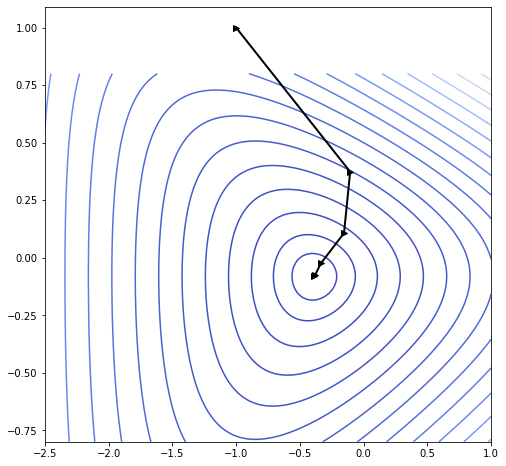

In [8]:
xvals = np.array([[np.linspace(-4,-0.5,20)], [np.zeros(20)]])
yvals = list(reversed(clf.function(xvals)[0]))

xx = np.linspace(-2.5,1,100)
yy = np.linspace(-0.8,0.8,100)
X, Y = np.meshgrid(xx, yy)

Z = clf.function(np.dstack((X,Y)).reshape((X.size, 2)).transpose())

Z = Z.reshape(X.shape)
cmap = plt.cm.get_cmap("coolwarm")
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.contour(X, Y, Z, yvals, cmap = cmap)
ax.plot(xbt[0,:], xbt[1,:], color='black', linewidth=2, marker='>')
plt.show()